# Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.utils import to_categorical, plot_model
from keras.optimizers import SGD #Stochastic Gradient Descent

import pickle

# Daten laden

In [6]:
# prepare gray scale data
data_gray_file = open('./archive/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archive/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)


# Daten vorverarbeiten, Shapes anpassen

In [7]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = data_color['y_train']
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [ ]:
# plot first few images
for i in range(9):
        plt.subplot(330+1+i)
        plt.imshow(x_train_color[i])

plt.show()

# Utils

In [4]:
def plotConfusionMatrix(y_true, y_pred):
    y_pred1 = np.argmax(y_pred, axis=1)
    y_true1=np.argmax(y_true, axis=1)

    cm = confusion_matrix(y_true=y_true1, y_pred=y_pred1)

    plt.figure(figsize=(14,12))
    sns.heatmap(cm, cmap=mpl.cm.Blues)

# DNN

## Daten reshapen damit sie als Vektor statt als 4D Array vorliegen

In [8]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


## Model Plots

In [9]:
plot_model(dnn_50_dropout, to_file='dnn_50_dropout.png')
plot_model(dnn_no_dropout, to_file='dnn_no_dropout.png')

NameError: name 'dnn_50_dropout' is not defined

# Dropouts

## Netze ohne Dropout

### Initial

Epoch 1/250
680/680 [==============================] - 3s 4ms/step - loss: 1.9185 - accuracy: 0.5106 - val_loss: 1.1825 - val_accuracy: 0.6880
Epoch 2/250
680/680 [==============================] - 3s 4ms/step - loss: 0.9810 - accuracy: 0.7804 - val_loss: 0.9795 - val_accuracy: 0.7477
Epoch 3/250
680/680 [==============================] - 3s 4ms/step - loss: 0.7536 - accuracy: 0.8331 - val_loss: 0.7942 - val_accuracy: 0.8041
Epoch 4/250
680/680 [==============================] - 3s 4ms/step - loss: 0.6278 - accuracy: 0.8579 - val_loss: 0.8146 - val_accuracy: 0.7941
Epoch 5/250
680/680 [==============================] - 3s 4ms/step - loss: 0.5341 - accuracy: 0.8768 - val_loss: 0.7467 - val_accuracy: 0.8106
Epoch 6/250
680/680 [==============================] - 3s 4ms/step - loss: 0.4706 - accuracy: 0.8874 - val_loss: 0.7197 - val_accuracy: 0.8245
Epoch 7/250
680/680 [==============================] - 3s 4ms/step - loss: 0.4146 - accuracy: 0.8995 - val_loss: 0.7053 - val_accuracy: 0.8393

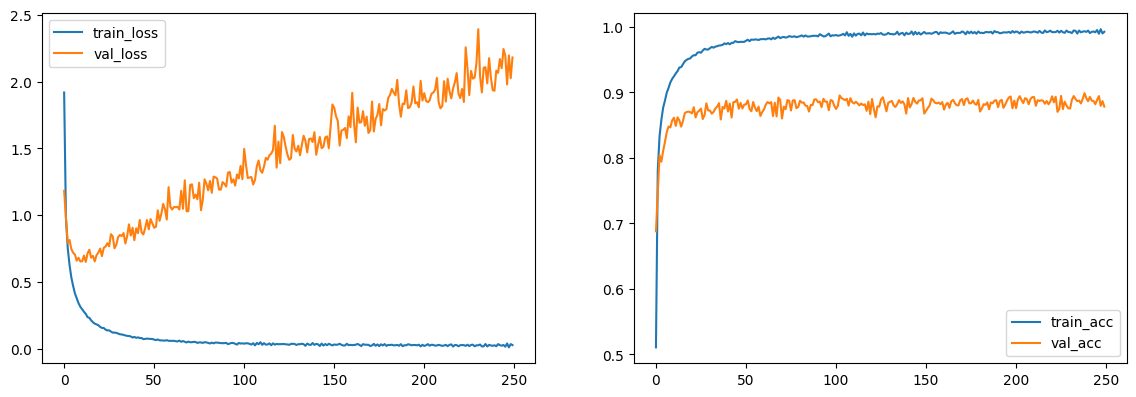

In [33]:
dnn_no_dropout = Sequential()
dnn_no_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_no_dropout.add(Dense(32, activation='relu'))
dnn_no_dropout.add(Dense(64, activation='relu'))
dnn_no_dropout.add(Dense(43, activation='softmax'))

dnn_no_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_no_dropout_history = dnn_no_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_no_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('initial_no_do.png')

### Early Stopping

Epoch 1/250
680/680 [==============================] - 2s 2ms/step - loss: 1.8675 - accuracy: 0.5249 - val_loss: 1.0976 - val_accuracy: 0.6953
Epoch 2/250
680/680 [==============================] - 1s 2ms/step - loss: 0.8929 - accuracy: 0.7992 - val_loss: 0.8470 - val_accuracy: 0.7829
Epoch 3/250
680/680 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.8440 - val_loss: 0.8081 - val_accuracy: 0.7919
Epoch 4/250
680/680 [==============================] - 1s 2ms/step - loss: 0.5974 - accuracy: 0.8627 - val_loss: 0.7398 - val_accuracy: 0.8200
Epoch 5/250
680/680 [==============================] - 1s 2ms/step - loss: 0.5124 - accuracy: 0.8782 - val_loss: 0.7751 - val_accuracy: 0.8184
Epoch 6/250
680/680 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.8911 - val_loss: 0.7077 - val_accuracy: 0.8322
Epoch 7/250
680/680 [==============================] - 1s 2ms/step - loss: 0.4125 - accuracy: 0.9001 - val_loss: 0.6792 - val_accuracy: 0.8478

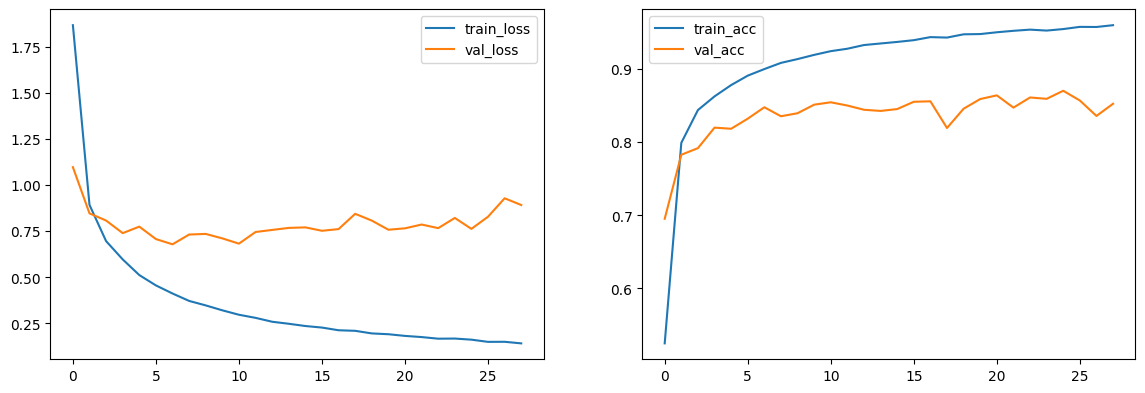

In [57]:
dnn_no_dropout = Sequential()
dnn_no_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_no_dropout.add(Dense(32, activation='relu'))
dnn_no_dropout.add(Dense(64, activation='relu'))
dnn_no_dropout.add(Dense(43, activation='softmax'))

dnn_no_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor="val_loss", min_delta=0.02, patience=12, verbose=1, restore_best_weights=True, start_from_epoch=15)

dnn_no_dropout_history = dnn_no_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray),
    callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_no_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('initial_early_stopping_no_do.png')

## Netze mit Dropout

### Initial Stärke 0.5

Epoch 1/250
680/680 [==============================] - 2s 3ms/step - loss: 3.7629 - accuracy: 0.0218 - val_loss: 3.7617 - val_accuracy: 0.0356
Epoch 2/250
680/680 [==============================] - 2s 2ms/step - loss: 3.7583 - accuracy: 0.0228 - val_loss: 3.6733 - val_accuracy: 0.0467
Epoch 3/250
680/680 [==============================] - 2s 2ms/step - loss: 3.6471 - accuracy: 0.0351 - val_loss: 3.3979 - val_accuracy: 0.0443
Epoch 4/250
680/680 [==============================] - 2s 2ms/step - loss: 3.6085 - accuracy: 0.0389 - val_loss: 3.4364 - val_accuracy: 0.0554
Epoch 5/250
680/680 [==============================] - 2s 2ms/step - loss: 3.5964 - accuracy: 0.0418 - val_loss: 3.3655 - val_accuracy: 0.0659
Epoch 6/250
680/680 [==============================] - 2s 2ms/step - loss: 3.5888 - accuracy: 0.0432 - val_loss: 3.4238 - val_accuracy: 0.0724
Epoch 7/250
680/680 [==============================] - 2s 2ms/step - loss: 3.5831 - accuracy: 0.0446 - val_loss: 3.4537 - val_accuracy: 0.0435

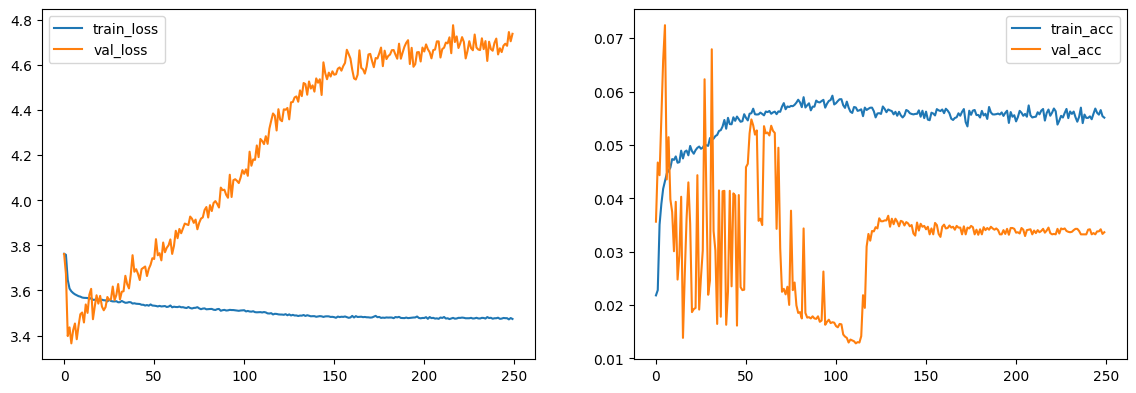

In [59]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(64, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(32, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(64, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_initial_do50.png')

### Iteration 1 Stärke 0.5

Zu großer Dropout & zu kleines Netz für die komplexen Daten

Epoch 1/250
680/680 [==============================] - 5s 7ms/step - loss: 3.5220 - accuracy: 0.0555 - val_loss: 2.8333 - val_accuracy: 0.2038
Epoch 2/250
680/680 [==============================] - 5s 7ms/step - loss: 3.0600 - accuracy: 0.1068 - val_loss: 2.5416 - val_accuracy: 0.2652
Epoch 3/250
680/680 [==============================] - 6s 8ms/step - loss: 2.9494 - accuracy: 0.1279 - val_loss: 2.4803 - val_accuracy: 0.3044
Epoch 4/250
680/680 [==============================] - 5s 8ms/step - loss: 2.9011 - accuracy: 0.1404 - val_loss: 2.4159 - val_accuracy: 0.3273
Epoch 5/250
680/680 [==============================] - 6s 8ms/step - loss: 2.8556 - accuracy: 0.1544 - val_loss: 2.3370 - val_accuracy: 0.3395
Epoch 6/250
680/680 [==============================] - 7s 10ms/step - loss: 2.8319 - accuracy: 0.1640 - val_loss: 2.3507 - val_accuracy: 0.3023
Epoch 7/250
680/680 [==============================] - 8s 11ms/step - loss: 2.8085 - accuracy: 0.1708 - val_loss: 2.4024 - val_accuracy: 0.26

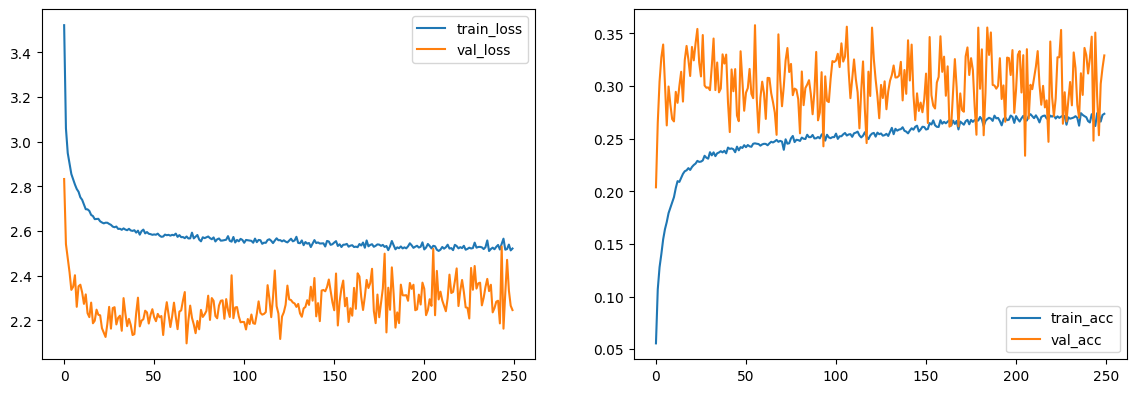

In [35]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(256, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(128, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(64, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout50_iteration_2_small.png')

### Iteration 2 Stärke 0.5 - 800-400-200

Epoch 1/250
680/680 [==============================] - 20s 29ms/step - loss: 2.8319 - accuracy: 0.1942 - val_loss: 1.5610 - val_accuracy: 0.5721
Epoch 2/250
680/680 [==============================] - 22s 32ms/step - loss: 1.7698 - accuracy: 0.4558 - val_loss: 1.0669 - val_accuracy: 0.7150
Epoch 3/250
680/680 [==============================] - 19s 28ms/step - loss: 1.4655 - accuracy: 0.5542 - val_loss: 0.9158 - val_accuracy: 0.7367
Epoch 4/250
680/680 [==============================] - 20s 29ms/step - loss: 1.3145 - accuracy: 0.6024 - val_loss: 0.7948 - val_accuracy: 0.7722
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 1.2397 - accuracy: 0.6244 - val_loss: 0.7923 - val_accuracy: 0.7587
Epoch 6/250
680/680 [==============================] - 20s 29ms/step - loss: 1.1709 - accuracy: 0.6484 - val_loss: 0.7164 - val_accuracy: 0.7930
Epoch 7/250
680/680 [==============================] - 21s 31ms/step - loss: 1.1219 - accuracy: 0.6639 - val_loss: 0.7720 - val_ac

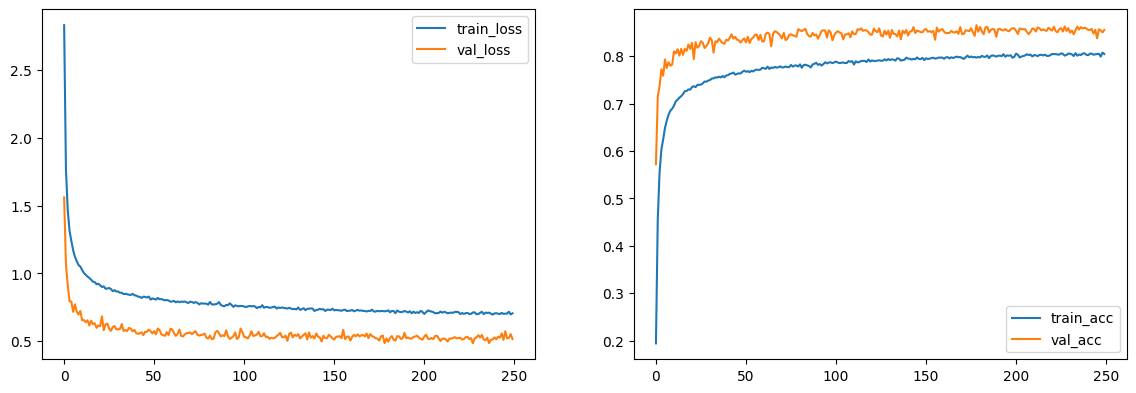

In [36]:
dnn_50_dropout = Sequential()

dnn_50_dropout.add(Dense(800, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(400, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(200, activation='relu'))
dnn_50_dropout.add(Dropout(0.5))
dnn_50_dropout.add(Dense(43, activation='softmax'))


dnn_50_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_history = dnn_50_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout50_iteration_2_medium.png')

### Iteration 3 Stärke 0.5 1024-512-256

Epoch 1/250
680/680 [==============================] - 18s 25ms/step - loss: 2.7291 - accuracy: 0.2182 - val_loss: 1.5123 - val_accuracy: 0.5549
Epoch 2/250
680/680 [==============================] - 17s 24ms/step - loss: 1.6445 - accuracy: 0.4942 - val_loss: 1.0455 - val_accuracy: 0.7160
Epoch 3/250
680/680 [==============================] - 18s 26ms/step - loss: 1.3604 - accuracy: 0.5864 - val_loss: 0.8921 - val_accuracy: 0.7479
Epoch 4/250
680/680 [==============================] - 19s 28ms/step - loss: 1.2287 - accuracy: 0.6271 - val_loss: 0.7323 - val_accuracy: 0.7915
Epoch 5/250
680/680 [==============================] - 19s 29ms/step - loss: 1.1298 - accuracy: 0.6621 - val_loss: 0.7049 - val_accuracy: 0.7912
Epoch 6/250
680/680 [==============================] - 20s 29ms/step - loss: 1.0648 - accuracy: 0.6818 - val_loss: 0.6623 - val_accuracy: 0.8038
Epoch 7/250
680/680 [==============================] - 20s 30ms/step - loss: 1.0154 - accuracy: 0.6998 - val_loss: 0.6504 - val_ac

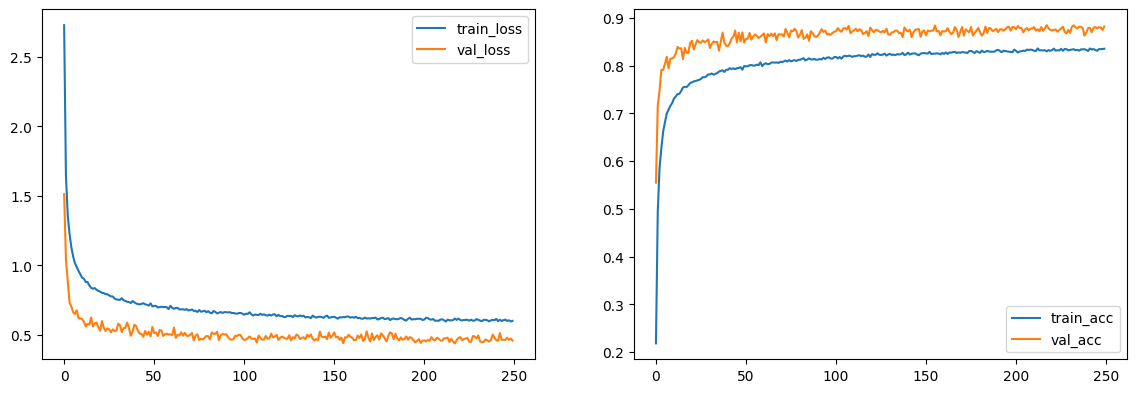

In [37]:
dnn_50_dropout_large = Sequential()

dnn_50_dropout_large.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_50_dropout_large.add(Dropout(0.5))
dnn_50_dropout_large.add(Dense(512, activation='relu'))
dnn_50_dropout_large.add(Dropout(0.5))
dnn_50_dropout_large.add(Dense(256, activation='relu'))
dnn_50_dropout_large.add(Dropout(0.5))
dnn_50_dropout_large.add(Dense(43, activation='softmax'))


dnn_50_dropout_large.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_50_dropout_large_history = dnn_50_dropout_large.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_50_dropout_large_history.history['loss'], label='train_loss')
plt.plot(dnn_50_dropout_large_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_50_dropout_large_history.history['accuracy'], label='train_acc')
plt.plot(dnn_50_dropout_large_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout50_iteration3_large.png')

### Iteration 4 Stärke 0.3

Epoch 1/250
680/680 [==============================] - 16s 22ms/step - loss: 1.6781 - accuracy: 0.5270 - val_loss: 0.7361 - val_accuracy: 0.7937
Epoch 2/250
680/680 [==============================] - 18s 26ms/step - loss: 0.6751 - accuracy: 0.8049 - val_loss: 0.5615 - val_accuracy: 0.8492
Epoch 3/250
680/680 [==============================] - 18s 27ms/step - loss: 0.5151 - accuracy: 0.8510 - val_loss: 0.5440 - val_accuracy: 0.8470
Epoch 4/250
680/680 [==============================] - 116s 171ms/step - loss: 0.4349 - accuracy: 0.8738 - val_loss: 0.4182 - val_accuracy: 0.8890
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 0.3776 - accuracy: 0.8897 - val_loss: 0.4226 - val_accuracy: 0.8856
Epoch 6/250
680/680 [==============================] - 17s 25ms/step - loss: 0.3466 - accuracy: 0.8967 - val_loss: 0.4296 - val_accuracy: 0.8815
Epoch 7/250
680/680 [==============================] - 18s 26ms/step - loss: 0.3137 - accuracy: 0.9071 - val_loss: 0.3760 - val_

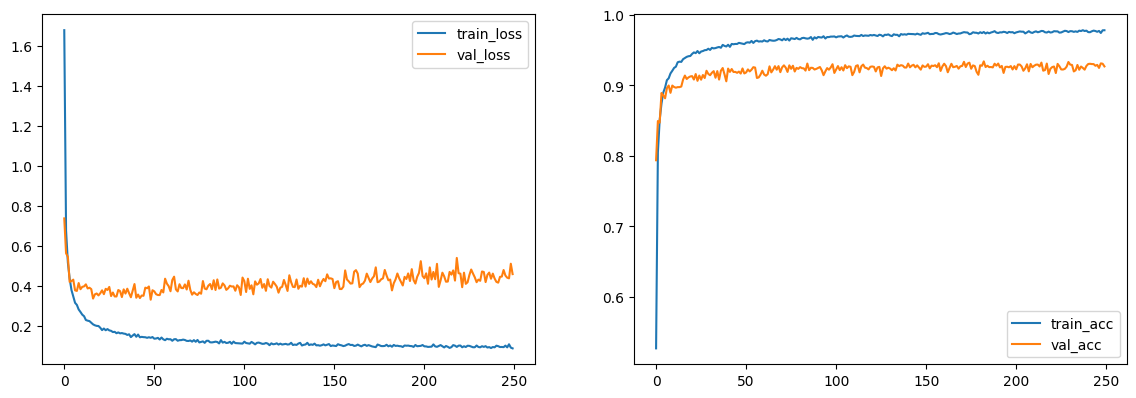

In [38]:
dnn_30_dropout = Sequential()

dnn_30_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_30_dropout.add(Dropout(0.3))
dnn_30_dropout.add(Dense(512, activation='relu'))
dnn_30_dropout.add(Dropout(0.3))
dnn_30_dropout.add(Dense(256, activation='relu'))
dnn_30_dropout.add(Dropout(0.3))
dnn_30_dropout.add(Dense(43, activation='softmax'))


dnn_30_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_30_dropout_history = dnn_30_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_30_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_30_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_30_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_30_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout30.png')

### Iteration 5 Stärke 0.4

Epoch 1/250
680/680 [==============================] - 19s 26ms/step - loss: 2.0809 - accuracy: 0.4084 - val_loss: 0.9152 - val_accuracy: 0.7314
Epoch 2/250
680/680 [==============================] - 20s 30ms/step - loss: 0.9867 - accuracy: 0.7101 - val_loss: 0.7041 - val_accuracy: 0.7955
Epoch 3/250
680/680 [==============================] - 20s 29ms/step - loss: 0.7875 - accuracy: 0.7680 - val_loss: 0.5829 - val_accuracy: 0.8316
Epoch 4/250
680/680 [==============================] - 19s 28ms/step - loss: 0.6859 - accuracy: 0.7975 - val_loss: 0.5557 - val_accuracy: 0.8443
Epoch 5/250
680/680 [==============================] - 18s 26ms/step - loss: 0.6303 - accuracy: 0.8142 - val_loss: 0.4854 - val_accuracy: 0.8600
Epoch 6/250
680/680 [==============================] - 17s 26ms/step - loss: 0.5721 - accuracy: 0.8322 - val_loss: 0.4679 - val_accuracy: 0.8679
Epoch 7/250
680/680 [==============================] - 18s 26ms/step - loss: 0.5403 - accuracy: 0.8412 - val_loss: 0.4586 - val_ac

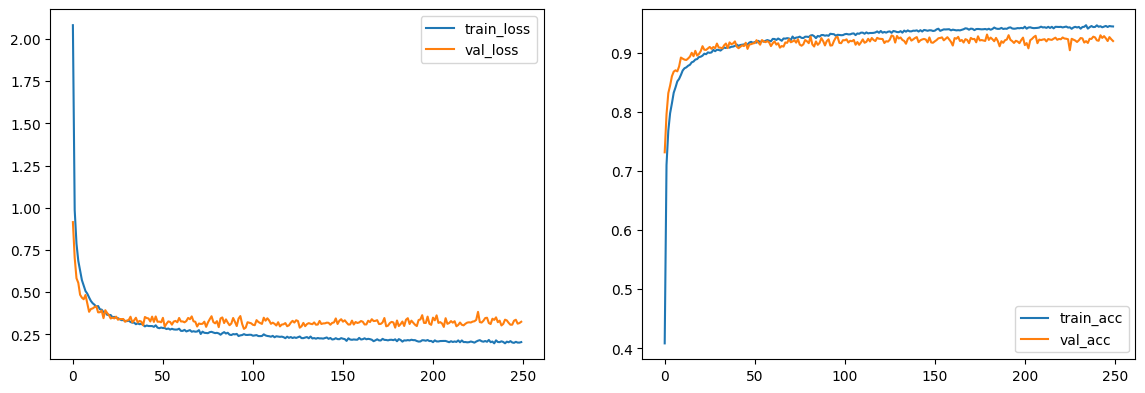

In [39]:
dnn_40_dropout = Sequential()

dnn_40_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_40_dropout.add(Dropout(0.4))
dnn_40_dropout.add(Dense(512, activation='relu'))
dnn_40_dropout.add(Dropout(0.4))
dnn_40_dropout.add(Dense(256, activation='relu'))
dnn_40_dropout.add(Dropout(0.4))
dnn_40_dropout.add(Dense(43, activation='softmax'))


dnn_40_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_40_dropout_history = dnn_40_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_40_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_40_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_40_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_40_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40.png')

### Iteration 6 Stärke 0.45

Epoch 1/250
680/680 [==============================] - 19s 25ms/step - loss: 2.4762 - accuracy: 0.2985 - val_loss: 1.0981 - val_accuracy: 0.6937
Epoch 2/250
680/680 [==============================] - 17s 25ms/step - loss: 1.2923 - accuracy: 0.6113 - val_loss: 0.7722 - val_accuracy: 0.7722
Epoch 3/250
680/680 [==============================] - 18s 26ms/step - loss: 1.0353 - accuracy: 0.6894 - val_loss: 0.6958 - val_accuracy: 0.7948
Epoch 4/250
680/680 [==============================] - 17s 25ms/step - loss: 0.9133 - accuracy: 0.7291 - val_loss: 0.6013 - val_accuracy: 0.8264
Epoch 5/250
680/680 [==============================] - 19s 28ms/step - loss: 0.8403 - accuracy: 0.7487 - val_loss: 0.5591 - val_accuracy: 0.8314
Epoch 6/250
680/680 [==============================] - 17s 25ms/step - loss: 0.7887 - accuracy: 0.7666 - val_loss: 0.5341 - val_accuracy: 0.8349
Epoch 7/250
680/680 [==============================] - 19s 28ms/step - loss: 0.7525 - accuracy: 0.7782 - val_loss: 0.5205 - val_ac

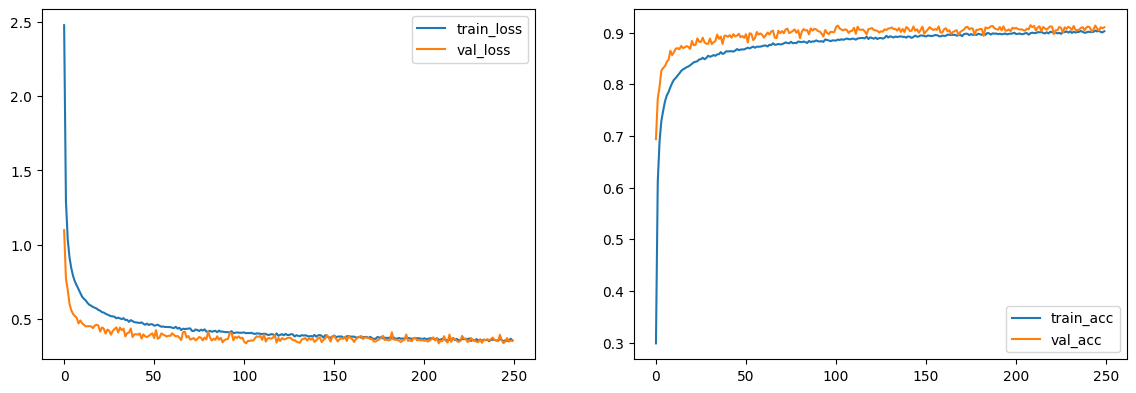

In [44]:
dnn_45_dropout = Sequential()

dnn_45_dropout.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_45_dropout.add(Dropout(0.45))
dnn_45_dropout.add(Dense(512, activation='relu'))
dnn_45_dropout.add(Dropout(0.45))
dnn_45_dropout.add(Dense(256, activation='relu'))
dnn_45_dropout.add(Dropout(0.45))
dnn_45_dropout.add(Dense(43, activation='softmax'))


dnn_45_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_45_dropout_history = dnn_45_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_45_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_45_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_45_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_45_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout45.png')

# Aktivierungsfunktionen

## Sigmoid

Epoch 1/125
680/680 [==============================] - 20s 28ms/step - loss: 2.4736 - accuracy: 0.3071 - val_loss: 1.1737 - val_accuracy: 0.6597
Epoch 2/125
680/680 [==============================] - 19s 28ms/step - loss: 0.9895 - accuracy: 0.7243 - val_loss: 0.7272 - val_accuracy: 0.7933
Epoch 3/125
680/680 [==============================] - 20s 29ms/step - loss: 0.6883 - accuracy: 0.8077 - val_loss: 0.6307 - val_accuracy: 0.8129
Epoch 4/125
680/680 [==============================] - 20s 30ms/step - loss: 0.5458 - accuracy: 0.8478 - val_loss: 0.5645 - val_accuracy: 0.8390
Epoch 5/125
680/680 [==============================] - 20s 29ms/step - loss: 0.4564 - accuracy: 0.8726 - val_loss: 0.5128 - val_accuracy: 0.8558
Epoch 6/125
680/680 [==============================] - 20s 29ms/step - loss: 0.3952 - accuracy: 0.8886 - val_loss: 0.4967 - val_accuracy: 0.8663
Epoch 7/125
680/680 [==============================] - 19s 28ms/step - loss: 0.3457 - accuracy: 0.9037 - val_loss: 0.4404 - val_ac

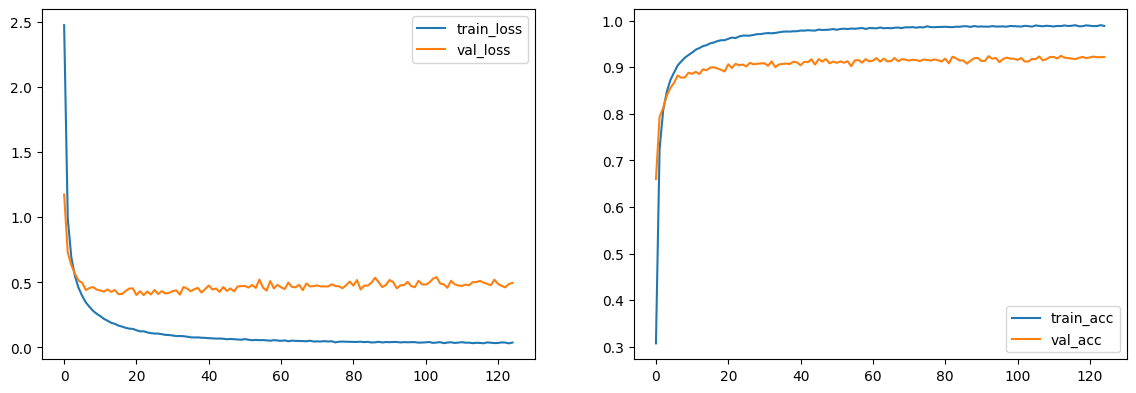

In [42]:
dnn_40_dropout_sigmoid = Sequential()

dnn_40_dropout_sigmoid.add(Dense(1024, activation='sigmoid', input_dim=(32*32*1)))
dnn_40_dropout_sigmoid.add(Dropout(0.4))
dnn_40_dropout_sigmoid.add(Dense(512, activation='sigmoid'))
dnn_40_dropout_sigmoid.add(Dropout(0.4))
dnn_40_dropout_sigmoid.add(Dense(256, activation='sigmoid'))
dnn_40_dropout_sigmoid.add(Dropout(0.4))
dnn_40_dropout_sigmoid.add(Dense(43, activation='softmax'))


dnn_40_dropout_sigmoid.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_40_dropout_sigmoid_history = dnn_40_dropout_sigmoid.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_40_dropout_sigmoid_history.history['loss'], label='train_loss')
plt.plot(dnn_40_dropout_sigmoid_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_40_dropout_sigmoid_history.history['accuracy'], label='train_acc')
plt.plot(dnn_40_dropout_sigmoid_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_sigmoid.png')

## ReLU

Epoch 1/125
680/680 [==============================] - 20s 28ms/step - loss: 2.0788 - accuracy: 0.4107 - val_loss: 0.9402 - val_accuracy: 0.7295
Epoch 2/125
680/680 [==============================] - 19s 28ms/step - loss: 0.9641 - accuracy: 0.7172 - val_loss: 0.6226 - val_accuracy: 0.8191
Epoch 3/125
680/680 [==============================] - 19s 28ms/step - loss: 0.7736 - accuracy: 0.7718 - val_loss: 0.5517 - val_accuracy: 0.8486
Epoch 4/125
680/680 [==============================] - 20s 29ms/step - loss: 0.6679 - accuracy: 0.8028 - val_loss: 0.5099 - val_accuracy: 0.8563
Epoch 5/125
680/680 [==============================] - 20s 30ms/step - loss: 0.5902 - accuracy: 0.8281 - val_loss: 0.5029 - val_accuracy: 0.8586
Epoch 6/125
680/680 [==============================] - 19s 29ms/step - loss: 0.5497 - accuracy: 0.8381 - val_loss: 0.4593 - val_accuracy: 0.8685
Epoch 7/125
680/680 [==============================] - 20s 29ms/step - loss: 0.5190 - accuracy: 0.8477 - val_loss: 0.4767 - val_ac

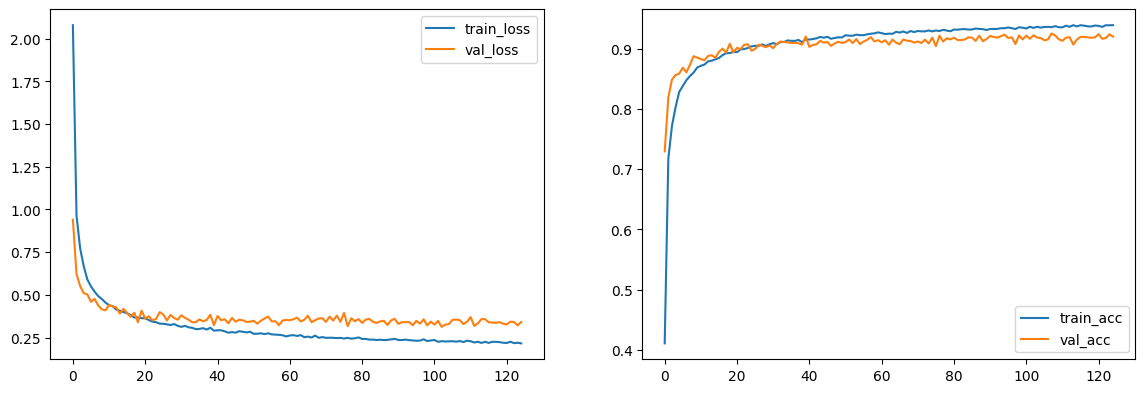

In [43]:
dnn_40_dropout_relu = Sequential()

dnn_40_dropout_relu.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_40_dropout_relu.add(Dropout(0.4))
dnn_40_dropout_relu.add(Dense(512, activation='relu'))
dnn_40_dropout_relu.add(Dropout(0.4))
dnn_40_dropout_relu.add(Dense(256, activation='relu'))
dnn_40_dropout_relu.add(Dropout(0.4))
dnn_40_dropout_relu.add(Dense(43, activation='softmax'))


dnn_40_dropout_relu.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

autoencoder_hist = dnn_40_dropout_relu.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(autoencoder_hist.history['loss'], label='train_loss')
plt.plot(autoencoder_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(autoencoder_hist.history['accuracy'], label='train_acc')
plt.plot(autoencoder_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_relu.png')

## GELU (Gaussian Error Linear Unit)

### GELU und Dropout

Epoch 1/125
680/680 [==============================] - 18s 25ms/step - loss: 1.4873 - accuracy: 0.5796 - val_loss: 0.7347 - val_accuracy: 0.7819
Epoch 2/125
680/680 [==============================] - 17s 26ms/step - loss: 0.5915 - accuracy: 0.8268 - val_loss: 0.5271 - val_accuracy: 0.8478
Epoch 3/125
680/680 [==============================] - 19s 27ms/step - loss: 0.4528 - accuracy: 0.8648 - val_loss: 0.4924 - val_accuracy: 0.8557
Epoch 4/125
680/680 [==============================] - 23s 33ms/step - loss: 0.3901 - accuracy: 0.8862 - val_loss: 0.3983 - val_accuracy: 0.8904
Epoch 5/125
680/680 [==============================] - 19s 27ms/step - loss: 0.3685 - accuracy: 0.8910 - val_loss: 0.3835 - val_accuracy: 0.8890
Epoch 6/125
680/680 [==============================] - 18s 27ms/step - loss: 0.3500 - accuracy: 0.8965 - val_loss: 0.3597 - val_accuracy: 0.8980
Epoch 7/125
680/680 [==============================] - 19s 28ms/step - loss: 0.3237 - accuracy: 0.9034 - val_loss: 0.3658 - val_ac

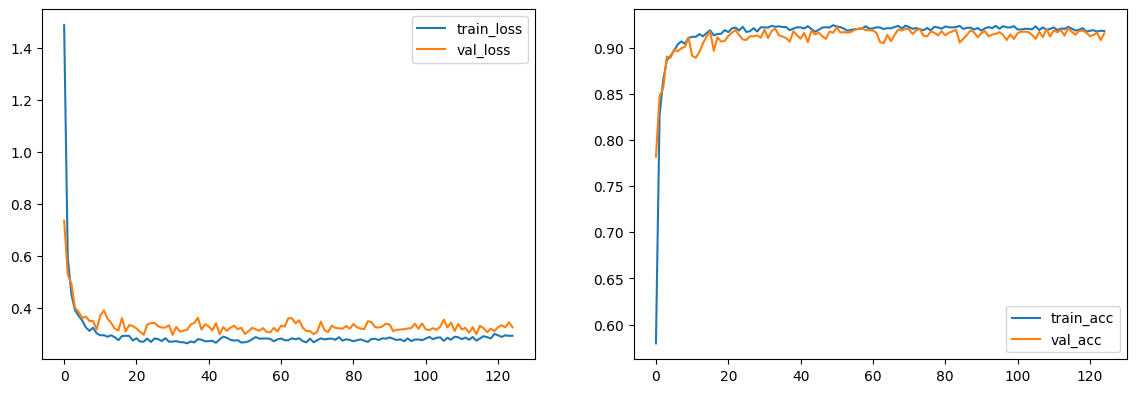

In [34]:
dnn_40_dropout_gelu = Sequential()

dnn_40_dropout_gelu.add(Dense(1024, activation='gelu', input_dim=(32*32*1)))
dnn_40_dropout_gelu.add(Dropout(0.4))
dnn_40_dropout_gelu.add(Dense(512, activation='gelu'))
dnn_40_dropout_gelu.add(Dropout(0.4))
dnn_40_dropout_gelu.add(Dense(256, activation='gelu'))
dnn_40_dropout_gelu.add(Dropout(0.4))
dnn_40_dropout_gelu.add(Dense(43, activation='softmax'))


dnn_40_dropout_gelu.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_40_dropout_gelu_history = dnn_40_dropout_gelu.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_40_dropout_gelu_history.history['loss'], label='train_loss')
plt.plot(dnn_40_dropout_gelu_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_40_dropout_gelu_history.history['accuracy'], label='train_acc')
plt.plot(dnn_40_dropout_gelu_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_gelu.png')

Epoch 1/125
340/340 [==============================] - 22s 60ms/step - loss: 3.0003 - accuracy: 0.1367 - val_loss: 1.9505 - val_accuracy: 0.3352
Epoch 2/125
340/340 [==============================] - 18s 53ms/step - loss: 1.8123 - accuracy: 0.4168 - val_loss: 1.2206 - val_accuracy: 0.6092
Epoch 3/125
340/340 [==============================] - 19s 55ms/step - loss: 1.3258 - accuracy: 0.5803 - val_loss: 0.8925 - val_accuracy: 0.7327
Epoch 4/125
340/340 [==============================] - 19s 57ms/step - loss: 1.0948 - accuracy: 0.6655 - val_loss: 0.7411 - val_accuracy: 0.7927
Epoch 5/125
340/340 [==============================] - 19s 56ms/step - loss: 0.9376 - accuracy: 0.7162 - val_loss: 0.6968 - val_accuracy: 0.7815
Epoch 6/125
340/340 [==============================] - 20s 58ms/step - loss: 0.8283 - accuracy: 0.7530 - val_loss: 0.6468 - val_accuracy: 0.7922
Epoch 7/125
340/340 [==============================] - 19s 56ms/step - loss: 0.7643 - accuracy: 0.7747 - val_loss: 0.5661 - val_ac

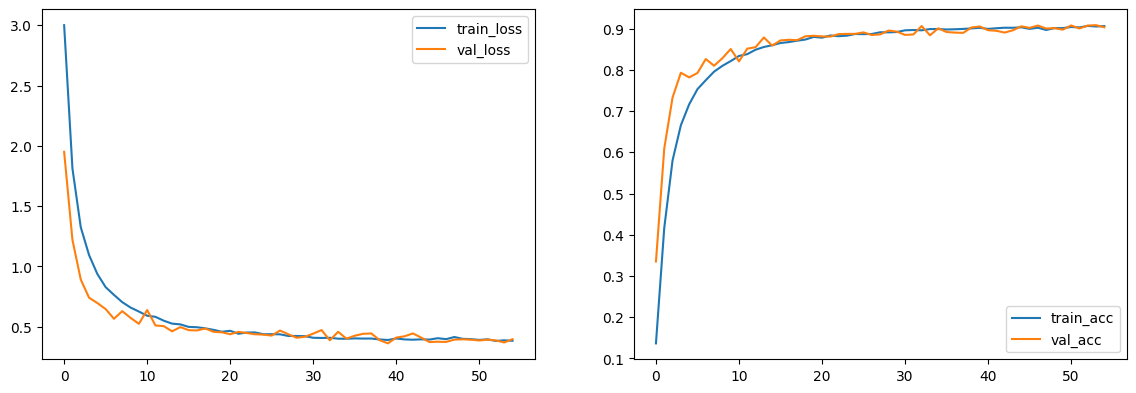

In [12]:
dnn_40_dropout_gelu_topo2 = Sequential()

dnn_40_dropout_gelu_topo2.add(Dense(1024, activation='gelu', input_dim=(32*32*1)))
dnn_40_dropout_gelu_topo2.add(Dropout(0.4))
dnn_40_dropout_gelu_topo2.add(Dense(512, activation='gelu'))
dnn_40_dropout_gelu_topo2.add(Dropout(0.4))
dnn_40_dropout_gelu_topo2.add(Dense(256, activation='gelu'))
dnn_40_dropout_gelu_topo2.add(Dropout(0.4))
dnn_40_dropout_gelu_topo2.add(Dense(128, activation='gelu'))
dnn_40_dropout_gelu_topo2.add(Dropout(0.4))
dnn_40_dropout_gelu_topo2.add(Dense(64, activation='gelu'))
dnn_40_dropout_gelu_topo2.add(Dropout(0.4))
dnn_40_dropout_gelu_topo2.add(Dense(256, activation='gelu'))
dnn_40_dropout_gelu_topo2.add(Dropout(0.4))
dnn_40_dropout_gelu_topo2.add(Dense(43, activation='softmax'))


dnn_40_dropout_gelu_topo2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping('val_loss', min_delta=0.005, patience=15, start_from_epoch=25, restore_best_weights=True, verbose=1)

dnn_40_dropout_gelu_topo2_history = dnn_40_dropout_gelu_topo2.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=256,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray),
    callbacks=[early_stopping]
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_40_dropout_gelu_topo2_history.history['loss'], label='train_loss')
plt.plot(dnn_40_dropout_gelu_topo2_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_40_dropout_gelu_topo2_history.history['accuracy'], label='train_acc')
plt.plot(dnn_40_dropout_gelu_topo2_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_gelu_topo2.png')

### GELU ohne Dropout

Epoch 1/125
680/680 [==============================] - 17s 23ms/step - loss: 0.7879 - accuracy: 0.7864 - val_loss: 0.9480 - val_accuracy: 0.7606
Epoch 2/125
680/680 [==============================] - 16s 23ms/step - loss: 0.2324 - accuracy: 0.9343 - val_loss: 0.5889 - val_accuracy: 0.8504
Epoch 3/125
680/680 [==============================] - 15s 22ms/step - loss: 0.1487 - accuracy: 0.9562 - val_loss: 0.6734 - val_accuracy: 0.8535
Epoch 4/125
680/680 [==============================] - 16s 24ms/step - loss: 0.1060 - accuracy: 0.9675 - val_loss: 0.6363 - val_accuracy: 0.8606
Epoch 5/125
680/680 [==============================] - 16s 23ms/step - loss: 0.0926 - accuracy: 0.9710 - val_loss: 0.6869 - val_accuracy: 0.8588
Epoch 6/125
680/680 [==============================] - 16s 23ms/step - loss: 0.0820 - accuracy: 0.9742 - val_loss: 0.6503 - val_accuracy: 0.8720
Epoch 7/125
680/680 [==============================] - 16s 23ms/step - loss: 0.0720 - accuracy: 0.9770 - val_loss: 0.7335 - val_ac

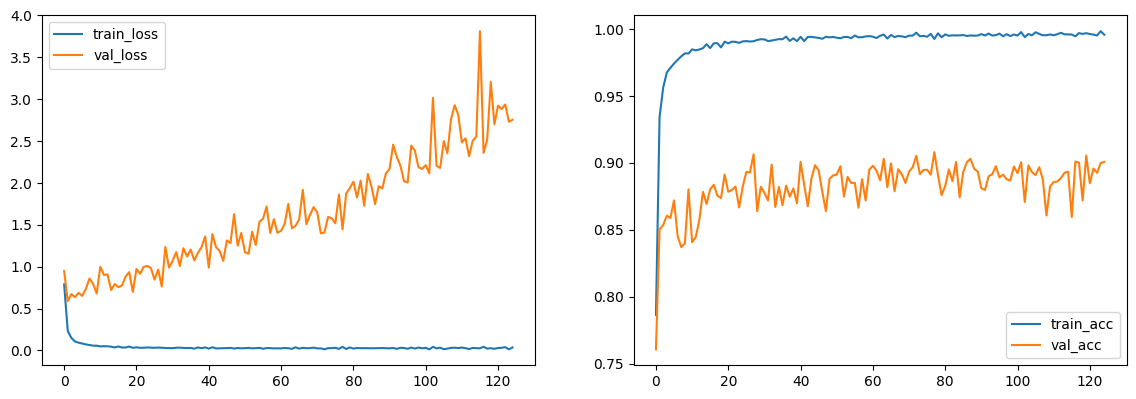

In [35]:
dnn_gelu_no_dropout = Sequential()

dnn_gelu_no_dropout.add(Dense(1024, activation='gelu', input_dim=(32*32*1)))
#dnn_gelu_no_dropout.add(Dropout(0.4))
dnn_gelu_no_dropout.add(Dense(512, activation='gelu'))
#dnn_gelu_no_dropout.add(Dropout(0.4))
dnn_gelu_no_dropout.add(Dense(256, activation='gelu'))
#dnn_gelu_no_dropout.add(Dropout(0.4))
dnn_gelu_no_dropout.add(Dense(43, activation='softmax'))


dnn_gelu_no_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_gelu_no_dropout_history = dnn_gelu_no_dropout.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_gelu_no_dropout_history.history['loss'], label='train_loss')
plt.plot(dnn_gelu_no_dropout_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_gelu_no_dropout_history.history['accuracy'], label='train_acc')
plt.plot(dnn_gelu_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_gelu_no_do.png')

# Optimizer

## Adagrad

Epoch 1/125
680/680 [==============================] - 20s 28ms/step - loss: 3.7776 - accuracy: 0.0294 - val_loss: 3.6949 - val_accuracy: 0.0714
Epoch 2/125
680/680 [==============================] - 20s 29ms/step - loss: 3.6985 - accuracy: 0.0495 - val_loss: 3.6181 - val_accuracy: 0.1325
Epoch 3/125
680/680 [==============================] - 20s 30ms/step - loss: 3.6218 - accuracy: 0.0744 - val_loss: 3.4968 - val_accuracy: 0.1842
Epoch 4/125
680/680 [==============================] - 18s 27ms/step - loss: 3.5028 - accuracy: 0.1045 - val_loss: 3.3178 - val_accuracy: 0.2346
Epoch 5/125
680/680 [==============================] - 20s 29ms/step - loss: 3.3422 - accuracy: 0.1360 - val_loss: 3.0901 - val_accuracy: 0.2729
Epoch 6/125
680/680 [==============================] - 20s 29ms/step - loss: 3.1523 - accuracy: 0.1740 - val_loss: 2.8244 - val_accuracy: 0.3223
Epoch 7/125
680/680 [==============================] - 21s 31ms/step - loss: 2.9651 - accuracy: 0.2074 - val_loss: 2.5818 - val_ac

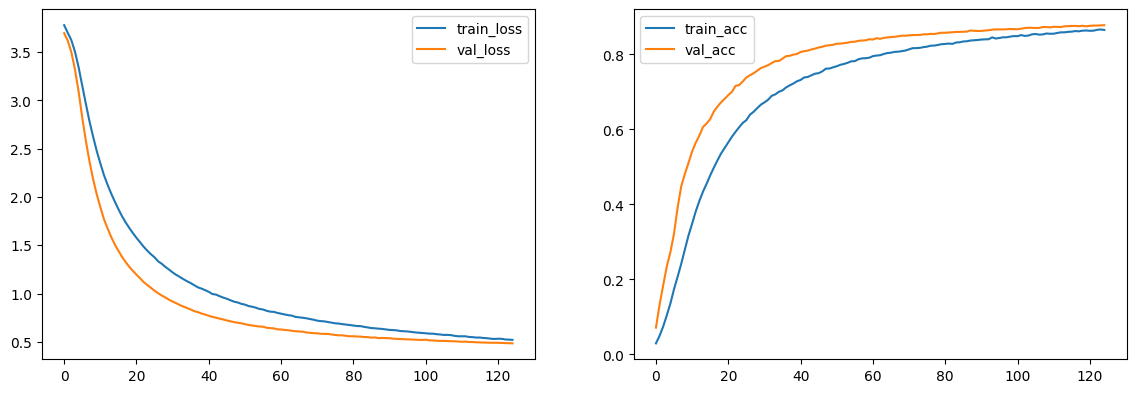

In [45]:
dnn_adagrad = Sequential()

dnn_adagrad.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_adagrad.add(Dropout(0.4))
dnn_adagrad.add(Dense(512, activation='relu'))
dnn_adagrad.add(Dropout(0.4))
dnn_adagrad.add(Dense(256, activation='relu'))
dnn_adagrad.add(Dropout(0.4))
dnn_adagrad.add(Dense(43, activation='softmax'))


dnn_adagrad.compile(
    optimizer='adagrad',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_adagrad_history = dnn_adagrad.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_adagrad_history.history['loss'], label='train_loss')
plt.plot(dnn_adagrad_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_adagrad_history.history['accuracy'], label='train_acc')
plt.plot(dnn_adagrad_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_adagrad.png')

## Adadelta

Epoch 1/250
680/680 [==============================] - 23s 31ms/step - loss: 3.8692 - accuracy: 0.0235 - val_loss: 3.7601 - val_accuracy: 0.0196
Epoch 2/250
680/680 [==============================] - 22s 33ms/step - loss: 3.8185 - accuracy: 0.0242 - val_loss: 3.7424 - val_accuracy: 0.0337
Epoch 3/250
680/680 [==============================] - 23s 34ms/step - loss: 3.7895 - accuracy: 0.0271 - val_loss: 3.7304 - val_accuracy: 0.0523
Epoch 4/250
680/680 [==============================] - 22s 33ms/step - loss: 3.7706 - accuracy: 0.0297 - val_loss: 3.7196 - val_accuracy: 0.0732
Epoch 5/250
680/680 [==============================] - 23s 33ms/step - loss: 3.7567 - accuracy: 0.0328 - val_loss: 3.7103 - val_accuracy: 0.0891
Epoch 6/250
680/680 [==============================] - 22s 33ms/step - loss: 3.7452 - accuracy: 0.0349 - val_loss: 3.7000 - val_accuracy: 0.1074
Epoch 7/250
680/680 [==============================] - 25s 37ms/step - loss: 3.7339 - accuracy: 0.0390 - val_loss: 3.6901 - val_ac

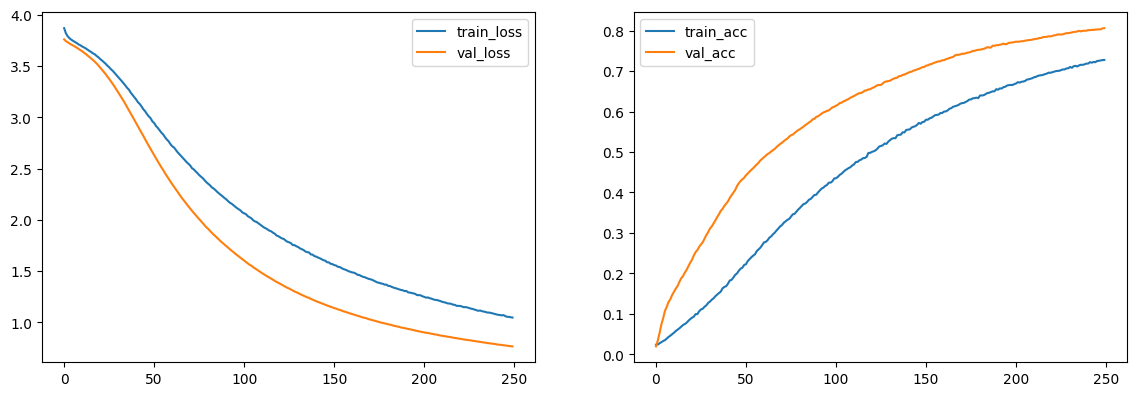

In [47]:
dnn_adadelta_250_ep = Sequential()

dnn_adadelta_250_ep.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_adadelta_250_ep.add(Dropout(0.4))
dnn_adadelta_250_ep.add(Dense(512, activation='relu'))
dnn_adadelta_250_ep.add(Dropout(0.4))
dnn_adadelta_250_ep.add(Dense(256, activation='relu'))
dnn_adadelta_250_ep.add(Dropout(0.4))
dnn_adadelta_250_ep.add(Dense(43, activation='softmax'))


dnn_adadelta_250_ep.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_adadelta_250_ep_history = dnn_adadelta_250_ep.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=250,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_adadelta_250_ep_history.history['loss'], label='train_loss')
plt.plot(dnn_adadelta_250_ep_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_adadelta_250_ep_history.history['accuracy'], label='train_acc')
plt.plot(dnn_adadelta_250_ep_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_adadelta_250_ep.png')

2023-01-24 13:06:24.316205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
680/680 [==============================] - 29s 42ms/step - loss: 3.8539 - accuracy: 0.0225 - val_loss: 3.7521 - val_accuracy: 0.0275
Epoch 2/500
680/680 [==============================] - 32s 46ms/step - loss: 3.8060 - accuracy: 0.0253 - val_loss: 3.7283 - val_accuracy: 0.0622
Epoch 3/500
680/680 [==============================] - 33s 49ms/step - loss: 3.7823 - accuracy: 0.0274 - val_loss: 3.7151 - val_accuracy: 0.0840
Epoch 4/500
680/680 [==============================] - 33s 48ms/step - loss: 3.7650 - accuracy: 0.0295 - val_loss: 3.7032 - val_accuracy: 0.1002
Epoch 5/500
680/680 [==============================] - 30s 44ms/step - loss: 3.7530 - accuracy: 0.0323 - val_loss: 3.6931 - val_accuracy: 0.1151
Epoch 6/500
680/680 [==============================] - 30s 44ms/step - loss: 3.7420 - accuracy: 0.0367 - val_loss: 3.6834 - val_accuracy: 0.1264
Epoch 7/500
680/680 [==============================] - 31s 45ms/step - loss: 3.7316 - accuracy: 0.0374 - val_loss: 3.6732 - val_ac

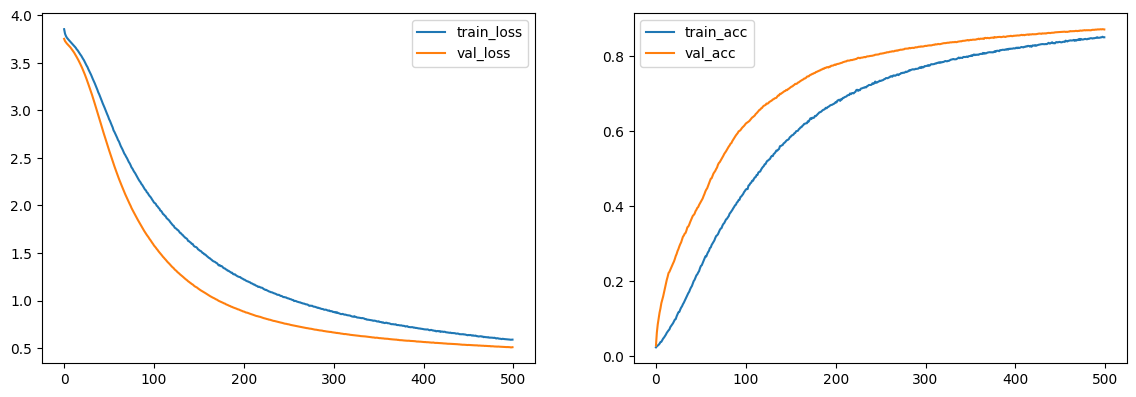

In [6]:
dnn_adadelta_500_ep = Sequential()

dnn_adadelta_500_ep.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_adadelta_500_ep.add(Dropout(0.4))
dnn_adadelta_500_ep.add(Dense(512, activation='relu'))
dnn_adadelta_500_ep.add(Dropout(0.4))
dnn_adadelta_500_ep.add(Dense(256, activation='relu'))
dnn_adadelta_500_ep.add(Dropout(0.4))
dnn_adadelta_500_ep.add(Dense(43, activation='softmax'))


dnn_adadelta_500_ep.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_adadelta_500_ep_history = dnn_adadelta_500_ep.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=500,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_adadelta_500_ep_history.history['loss'], label='train_loss')
plt.plot(dnn_adadelta_500_ep_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_adadelta_500_ep_history.history['accuracy'], label='train_acc')
plt.plot(dnn_adadelta_500_ep_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_adadelta_500_ep.png')

## Adam

In [8]:
dnn_adam = Sequential()

dnn_adam.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
dnn_adam.add(Dropout(0.4))
dnn_adam.add(Dense(512, activation='relu'))
dnn_adam.add(Dropout(0.4))
dnn_adam.add(Dense(256, activation='relu'))
dnn_adam.add(Dropout(0.4))
dnn_adam.add(Dense(43, activation='softmax'))


dnn_adam.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

dnn_adam_hist = dnn_adam.fit(
    x=x_train_gray,
    y=y_train_gray,
    epochs=125,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_gray, y_test_gray)
)

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(dnn_adam_hist.history['loss'], label='train_loss')
plt.plot(dnn_adam_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(dnn_adam_hist.history['accuracy'], label='train_acc')
plt.plot(dnn_adam_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_adam.png')

Epoch 1/125
334/680 [=============>................] - ETA: 10s - loss: 2.8283 - accuracy: 0.2108

KeyboardInterrupt: 

## Batchsizes, Epochs

In [19]:
# Create function to compile and fit a model with different batch sizes and plot the results
def fitAndPlotBatch(x_train, y_train, x_test, y_test, batch_size, epochs):
    # define model
    model = Sequential()

    model.add(Dense(1024, activation='relu', input_dim=(32*32*1)))
    model.add(Dropout(0.4))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(43, activation='softmax'))

    # compile
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # train
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        validation_data=(x_test, y_test)
    )

    return history

Epoch 1/32
340/340 [==============================] - 11s 29ms/step - loss: 2.2429 - accuracy: 0.3709 - val_loss: 0.9671 - val_accuracy: 0.7223
Epoch 2/32
340/340 [==============================] - 10s 30ms/step - loss: 0.9552 - accuracy: 0.7237 - val_loss: 0.6407 - val_accuracy: 0.8230
Epoch 3/32
340/340 [==============================] - 10s 30ms/step - loss: 0.7288 - accuracy: 0.7883 - val_loss: 0.5767 - val_accuracy: 0.8306
Epoch 4/32
340/340 [==============================] - 10s 29ms/step - loss: 0.6117 - accuracy: 0.8215 - val_loss: 0.5310 - val_accuracy: 0.8474
Epoch 5/32
340/340 [==============================] - 9s 28ms/step - loss: 0.5550 - accuracy: 0.8388 - val_loss: 0.4860 - val_accuracy: 0.8682
Epoch 6/32
340/340 [==============================] - 10s 28ms/step - loss: 0.5129 - accuracy: 0.8507 - val_loss: 0.4810 - val_accuracy: 0.8657
Epoch 7/32
340/340 [==============================] - 10s 28ms/step - loss: 0.4806 - accuracy: 0.8594 - val_loss: 0.4415 - val_accuracy: 

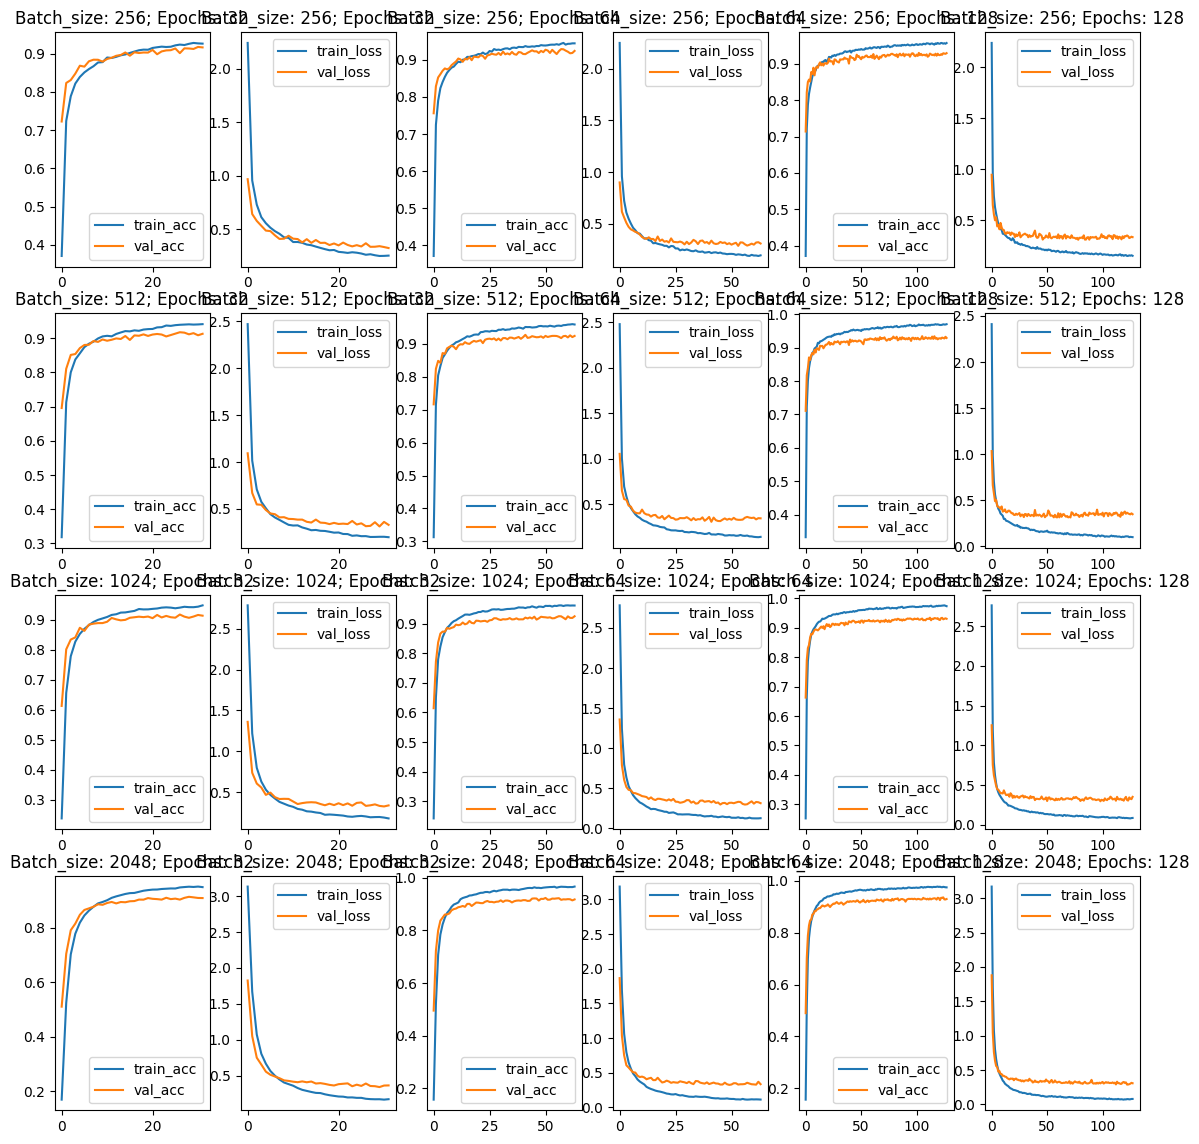

<Figure size 640x480 with 0 Axes>

In [32]:
# Try different batch sizes
batch_sizes = [256, 512, 1024, 2048]
epochs = [32, 64, 128]

fig, axs = plt.subplots(nrows=len(batch_sizes), ncols=len(epochs)*2, figsize=(14, 14))

for i in range(len(batch_sizes)):
    for j in range(len(epochs)):
        
        #use function from above to fit and plot
        hist = fitAndPlotBatch(x_train=x_train_gray,
            y_train=y_train_gray,
            x_test=x_test_gray,
            y_test=y_test_gray,
            batch_size=batch_sizes[i],
            epochs=epochs[j]
        )

        row = i
        col = j

        axs[row, col*2].set_title('Batch_size: ' + str(batch_sizes[i]) + '; Epochs: ' + str(epochs[j]))
        axs[row, col*2].plot(hist.history['accuracy'], label='train_acc')
        axs[row, col*2].plot(hist.history['val_accuracy'], label='val_acc')
        axs[row, col*2].legend()

        axs[row, col*2+1].set_title('Batch_size: ' + str(batch_sizes[i]) + '; Epochs: ' + str(epochs[j]))
        axs[row, col*2+1].plot(hist.history['loss'], label='train_loss')
        axs[row, col*2+1].plot(hist.history['val_loss'], label='val_loss')
        axs[row, col*2+1].legend()


plt.show()
plt.savefig('batch_sizes.png')

Epoch 1/32
340/340 [==============================] - 14s 32ms/step - loss: 2.2684 - accuracy: 0.3625 - val_loss: 0.9366 - val_accuracy: 0.7332
Epoch 2/32
340/340 [==============================] - 11s 33ms/step - loss: 0.9602 - accuracy: 0.7212 - val_loss: 0.6423 - val_accuracy: 0.8211
Epoch 3/32
340/340 [==============================] - 11s 33ms/step - loss: 0.7122 - accuracy: 0.7939 - val_loss: 0.5632 - val_accuracy: 0.8475
Epoch 4/32
340/340 [==============================] - 11s 32ms/step - loss: 0.5946 - accuracy: 0.8292 - val_loss: 0.4993 - val_accuracy: 0.8565
Epoch 5/32
340/340 [==============================] - 11s 32ms/step - loss: 0.5280 - accuracy: 0.8475 - val_loss: 0.4553 - val_accuracy: 0.8764
Epoch 6/32
340/340 [==============================] - 10s 31ms/step - loss: 0.4749 - accuracy: 0.8615 - val_loss: 0.4789 - val_accuracy: 0.8686
Epoch 7/32
340/340 [==============================] - 10s 30ms/step - loss: 0.4547 - accuracy: 0.8680 - val_loss: 0.4189 - val_accuracy:

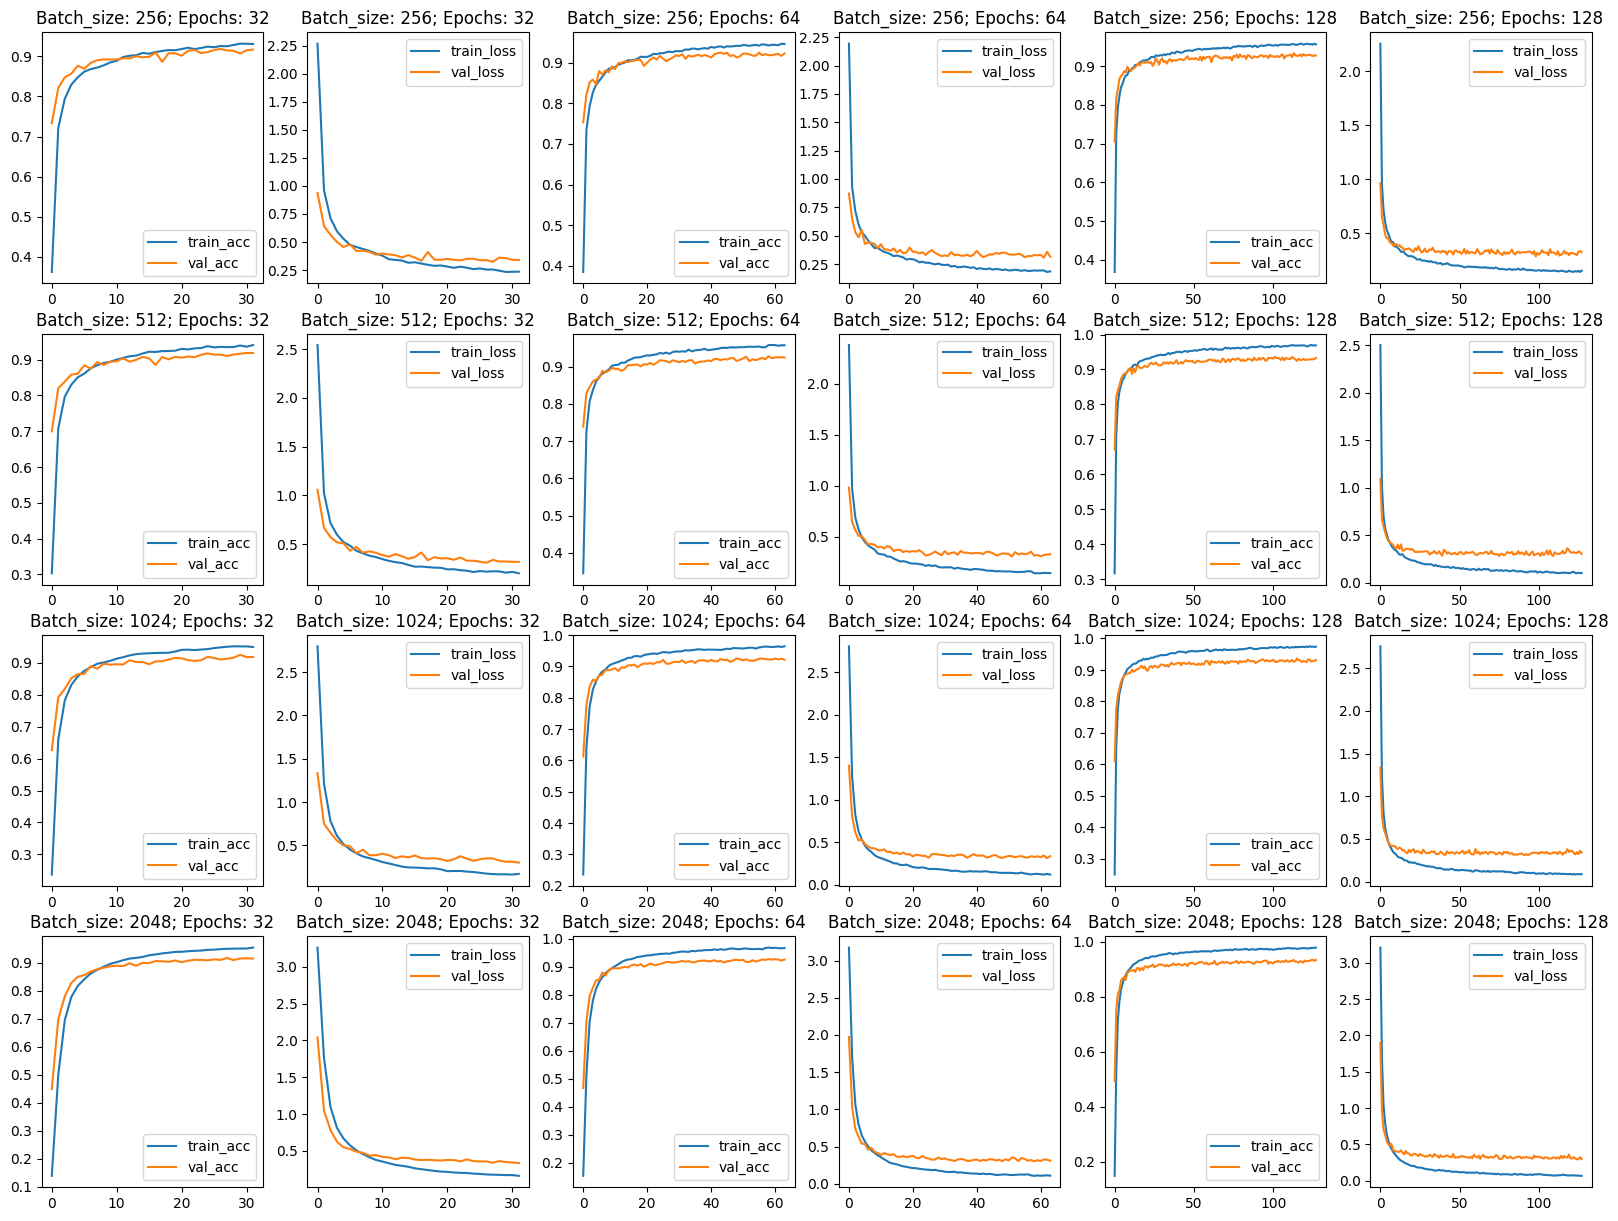

<Figure size 640x480 with 0 Axes>

In [33]:
# Try different batch sizes
batch_sizes = [256, 512, 1024, 2048]
epochs = [32, 64, 128]

fig, axs = plt.subplots(nrows=len(batch_sizes), ncols=len(epochs)*2, figsize=(20, 15))

for i in range(len(batch_sizes)):
    for j in range(len(epochs)):
        
        #use function from above to fit and plot
        hist = fitAndPlotBatch(x_train=x_train_gray,
            y_train=y_train_gray,
            x_test=x_test_gray,
            y_test=y_test_gray,
            batch_size=batch_sizes[i],
            epochs=epochs[j]
        )

        row = i
        col = j

        axs[row, col*2].set_title('Batch_size: ' + str(batch_sizes[i]) + '; Epochs: ' + str(epochs[j]))
        axs[row, col*2].plot(hist.history['accuracy'], label='train_acc')
        axs[row, col*2].plot(hist.history['val_accuracy'], label='val_acc')
        axs[row, col*2].legend()

        axs[row, col*2+1].set_title('Batch_size: ' + str(batch_sizes[i]) + '; Epochs: ' + str(epochs[j]))
        axs[row, col*2+1].plot(hist.history['loss'], label='train_loss')
        axs[row, col*2+1].plot(hist.history['val_loss'], label='val_loss')
        axs[row, col*2+1].legend()


plt.show()
plt.savefig('batch_sizes.png')

# Convolutions

## Grau

### Initial

## Farbe

### Initial

Epoch 1/200
680/680 [==============================] - 43s 61ms/step - loss: 0.9432 - accuracy: 0.7697 - val_loss: 0.6524 - val_accuracy: 0.8459
Epoch 2/200
680/680 [==============================] - 41s 60ms/step - loss: 0.1887 - accuracy: 0.9603 - val_loss: 0.5949 - val_accuracy: 0.8644
Epoch 3/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0899 - accuracy: 0.9810 - val_loss: 0.5243 - val_accuracy: 0.8894
Epoch 4/200
680/680 [==============================] - 40s 58ms/step - loss: 0.0596 - accuracy: 0.9864 - val_loss: 0.6587 - val_accuracy: 0.8732
Epoch 5/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0414 - accuracy: 0.9905 - val_loss: 0.6261 - val_accuracy: 0.8841
Epoch 6/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.6919 - val_accuracy: 0.8800
Epoch 7/200
680/680 [==============================] - 40s 59ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.6445 - val_ac

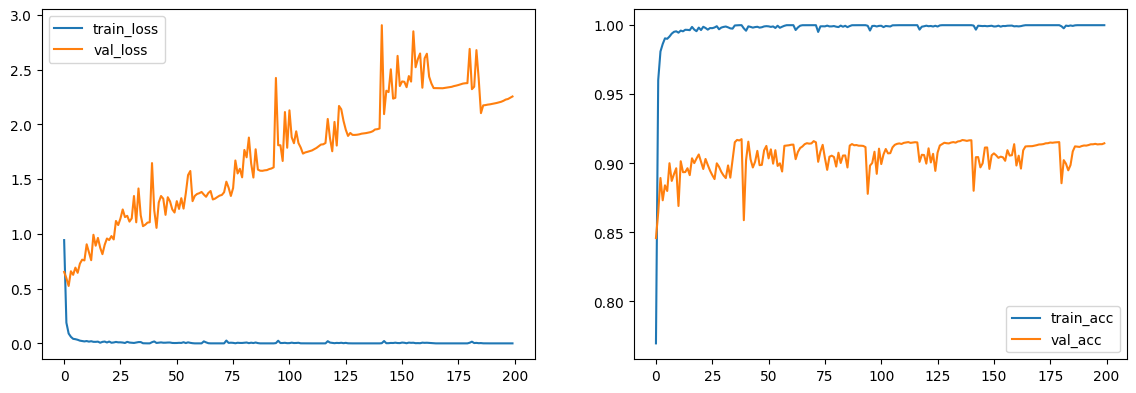

In [65]:
cnn_col_init = Sequential()
cnn_col_init.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn_col_init.add(MaxPooling2D(pool_size=2))
cnn_col_init.add(Flatten())
cnn_col_init.add(Dense(512, activation='relu'))
cnn_col_init.add(Dense(43, activation='softmax'))
cnn_col_init.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


cnn_col_init_hist = cnn_col_init.fit(x_train_color, y_train_color, 
        epochs=200,
        batch_size=128,
        verbose=1,
        validation_data=(x_test_color, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(cnn_col_init_hist.history['loss'], label='train_loss')
plt.plot(cnn_col_init_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(cnn_col_init_hist.history['accuracy'], label='train_acc')
plt.plot(cnn_col_init_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('cnn_col_init.png')

Epoch 1/100
680/680 [==============================] - 45s 65ms/step - loss: 1.3043 - accuracy: 0.6217 - val_loss: 0.5488 - val_accuracy: 0.8367
Epoch 2/100
680/680 [==============================] - 43s 64ms/step - loss: 0.3336 - accuracy: 0.9009 - val_loss: 0.4026 - val_accuracy: 0.8874
Epoch 3/100
680/680 [==============================] - 42s 62ms/step - loss: 0.2145 - accuracy: 0.9362 - val_loss: 0.3457 - val_accuracy: 0.9074
Epoch 4/100
680/680 [==============================] - 42s 62ms/step - loss: 0.1679 - accuracy: 0.9509 - val_loss: 0.3453 - val_accuracy: 0.9181
Epoch 5/100
680/680 [==============================] - 42s 62ms/step - loss: 0.1414 - accuracy: 0.9583 - val_loss: 0.3198 - val_accuracy: 0.9199
Epoch 6/100
680/680 [==============================] - 42s 61ms/step - loss: 0.1192 - accuracy: 0.9643 - val_loss: 0.3635 - val_accuracy: 0.9091
Epoch 7/100
680/680 [==============================] - 41s 60ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.3564 - val_ac

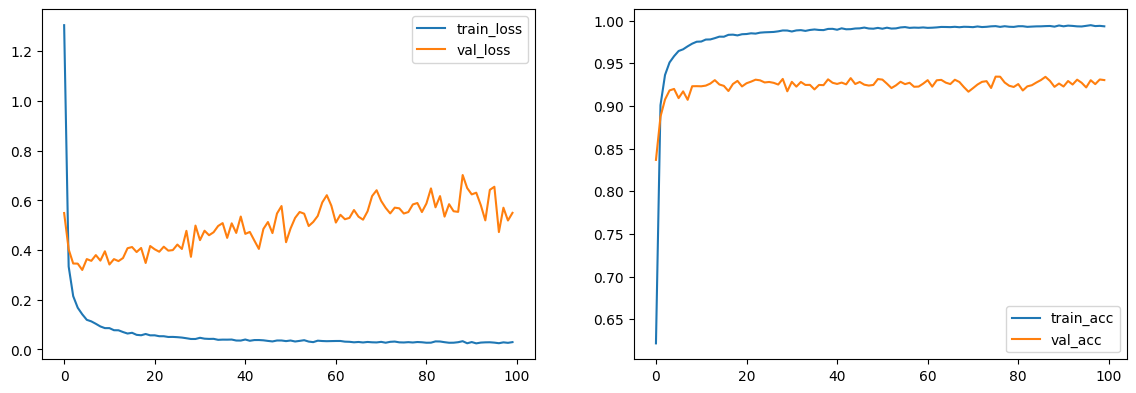

In [37]:
cnn_itr2_col = Sequential()
cnn_itr2_col.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn_itr2_col.add(MaxPooling2D(pool_size=2))
cnn_itr2_col.add(Flatten())
cnn_itr2_col.add(Dense(512, activation='relu'))
cnn_itr2_col.add(Dropout(0.45))
cnn_itr2_col.add(Dense(256, activation='relu'))
cnn_itr2_col.add(Dropout(0.3))
cnn_itr2_col.add(Dense(43, activation='softmax'))
cnn_itr2_col.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


cnn_itr2_col_hist = cnn_itr2_col.fit(x_train_color, y_train_color, 
        epochs=100,
        batch_size=128,
        verbose=1,
        validation_data=(x_test_color, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(cnn_itr2_col_hist.history['loss'], label='train_loss')
plt.plot(cnn_itr2_col_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(cnn_itr2_col_hist.history['accuracy'], label='train_acc')
plt.plot(cnn_itr2_col_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('cnn_dropout_initial_color.png')

Model: "sequential_137"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                               

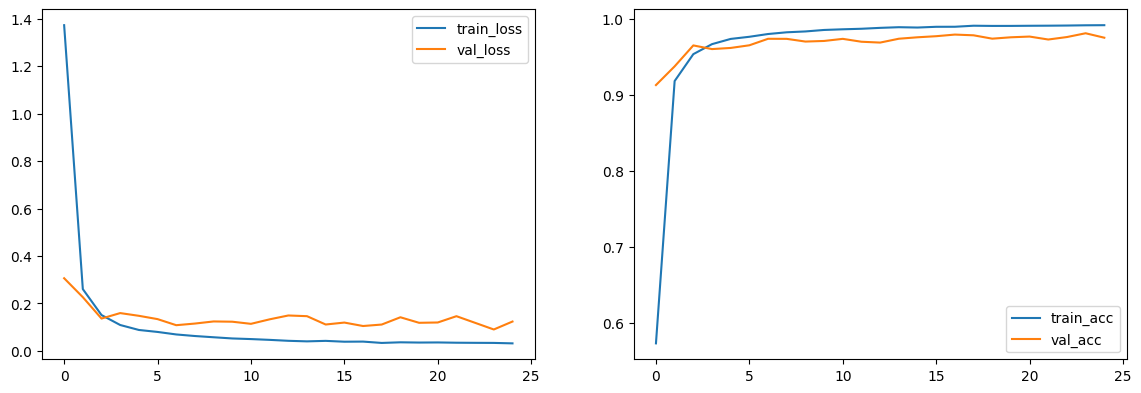

In [42]:
cnn_gelu_big_color = Sequential()

cnn_gelu_big_color.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn_gelu_big_color.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
cnn_gelu_big_color.add(MaxPooling2D(pool_size=2))

cnn_gelu_big_color.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
cnn_gelu_big_color.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
cnn_gelu_big_color.add(MaxPooling2D(pool_size=2))
cnn_gelu_big_color.add(Flatten())

cnn_gelu_big_color.add(Dropout(0.45))
cnn_gelu_big_color.add(Dense(512, activation='gelu'))

cnn_gelu_big_color.add(Dropout(0.45))
cnn_gelu_big_color.add(Dense(256, activation='gelu'))

cnn_gelu_big_color.add(Dropout(0.35))
cnn_gelu_big_color.add(Dense(128, activation='gelu'))

cnn_gelu_big_color.add(Dropout(0.35))
cnn_gelu_big_color.add(Dense(256, activation='gelu'))

cnn_gelu_big_color.add(Dense(43, activation='softmax'))
cnn_gelu_big_color.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_gelu_big_color.summary()

cnn_gelu_big_color = cnn_gelu_big_color.fit(x_train_color, y_train_color, 
        epochs=25,
        batch_size=128,
        verbose=1,
        validation_data=(x_test_color, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(cnn_gelu_big_color.history['loss'], label='train_loss')
plt.plot(cnn_gelu_big_color.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(cnn_gelu_big_color.history['accuracy'], label='train_acc')
plt.plot(cnn_gelu_big_color.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('cnn_gelu_big_color.png')

# Autoencoder

In [52]:
# Encoder
enc_input = Input(shape=(32, 32, 3))
enc_conv1 = Conv2D(32, (2, 2), activation='gelu', padding='same')(enc_input)
enc_conv2 = Conv2D(24, (2,2), activation='gelu', padding='same')(enc_conv1)
enc_pooling1 = MaxPooling2D(2, 2)(enc_conv2)
enc_conv3 = Conv2D(16, (2, 2), activation='gelu', padding='same')(enc_pooling1)

encoder = Model(enc_input, enc_conv3)
encoder.summary()


# Decoder
dec_input = Input((16, 16, 16))
dec_conv1 = Conv2DTranspose(32, (3,3), strides = 2, activation='gelu', padding='same')(dec_input)
dec_output = Conv2D(3, (3,3), activation='sigmoid', padding='same')(dec_conv1)

decoder = Model(dec_input, dec_output)
decoder.summary()

# Autoencoder
ae_input = Input((32, 32 ,3))
ae_enc_out = encoder(ae_input)
ae_dec_out = decoder(ae_enc_out)

autoencoder = Model(ae_input, ae_dec_out)

autoencoder.summary()


Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_78 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 24)        3096      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 16, 16, 16)        1552      
                                                                 
Total params: 5,064
Trainable params: 5,064
Non-trainable params: 0
________________________________________________________

Epoch 1/40
340/340 [==============================] - 137s 399ms/step - loss: 0.4631 - accuracy: 0.5094 - val_loss: 0.4708 - val_accuracy: 0.5106
Epoch 2/40
340/340 [==============================] - 131s 385ms/step - loss: 0.4439 - accuracy: 0.6539 - val_loss: 0.4613 - val_accuracy: 0.7396
Epoch 3/40
340/340 [==============================] - 130s 382ms/step - loss: 0.4396 - accuracy: 0.7673 - val_loss: 0.4593 - val_accuracy: 0.7771
Epoch 4/40
340/340 [==============================] - 130s 381ms/step - loss: 0.4383 - accuracy: 0.7867 - val_loss: 0.4580 - val_accuracy: 0.7840
Epoch 5/40
340/340 [==============================] - 129s 379ms/step - loss: 0.4375 - accuracy: 0.7979 - val_loss: 0.4572 - val_accuracy: 0.7890
Epoch 6/40
340/340 [==============================] - 128s 377ms/step - loss: 0.4369 - accuracy: 0.8026 - val_loss: 0.4567 - val_accuracy: 0.7965
Epoch 7/40
340/340 [==============================] - 126s 371ms/step - loss: 0.4365 - accuracy: 0.8086 - val_loss: 0.4562 -

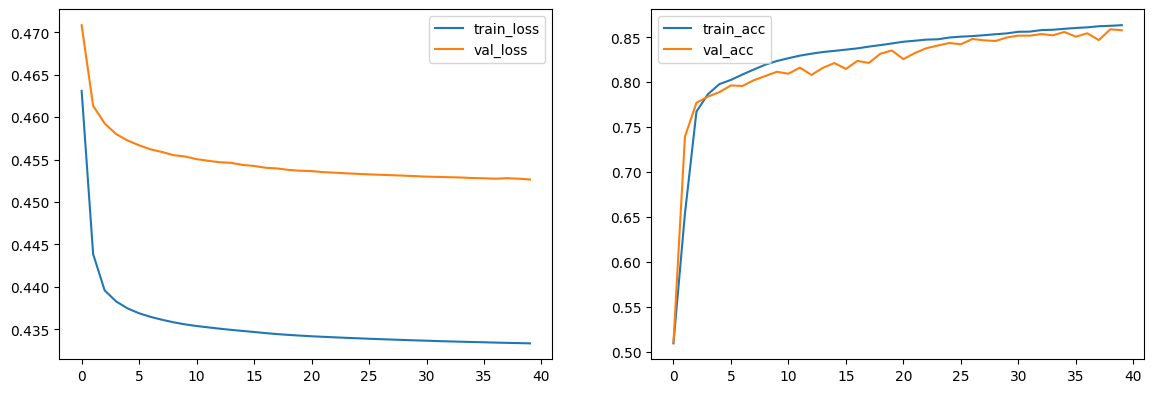

In [54]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class_hist = autoencoder.fit(
    x_train_color,
    x_train_color,
    batch_size=256,
    epochs=40,
    verbose=1,
    validation_data=(x_test_color, x_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(class_hist.history['loss'], label='train_loss')
plt.plot(class_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(class_hist.history['accuracy'], label='train_acc')
plt.plot(class_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_relu.png')

### Komprimierten Output des Encoders als Input für einen Klassifikator nutzen

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 16, 16, 16)        1040      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 5, 5, 12)          780       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 2, 2, 12)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 48)                0         
                                                                 
 dropout_52 (Dropout)        (None, 48)              

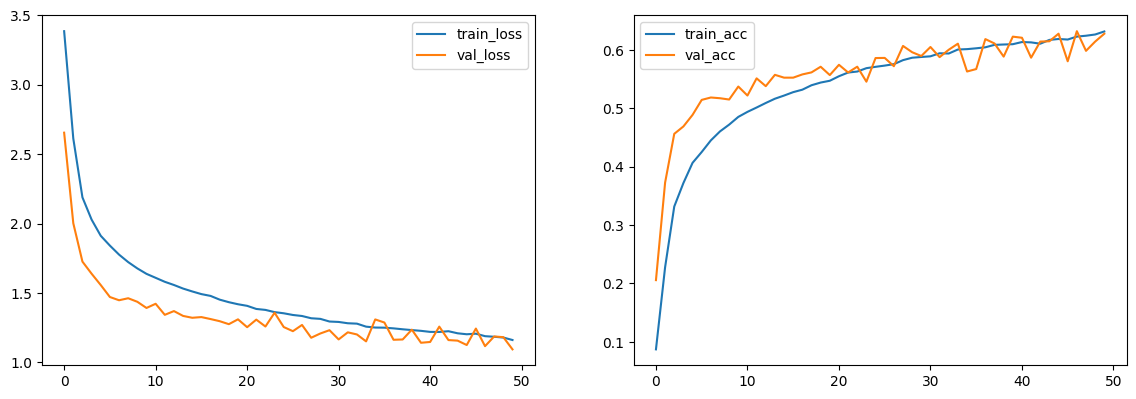

In [62]:
classifier = Sequential()
classifier.add(Conv2D(16, (2, 2), activation='relu', padding='same', input_shape=(16, 16, 16)))
classifier.add(MaxPooling2D(3, 3))
classifier.add(Conv2D(12, (2, 2), activation='relu', padding='same'))
classifier.add(MaxPooling2D(2, 2))
classifier.add(Flatten())
classifier.add(Dropout(0.4))
classifier.add(Dense(1024, activation='gelu', kernel_initializer='he_uniform'))
classifier.add(Dropout(0.4))
classifier.add(Dense(512, activation='gelu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(256, activation='gelu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(43, activation='softmax'))

classifier.summary()
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(y_test_color.shape)
print(y_train_color.shape)

# Daten durch den Encoder schieben
data_train = encoder.predict(x_train_color)
data_test = encoder.predict(x_test_color)


classifier_hist = classifier.fit(
    data_train,
    y_train_color,
    verbose=1,
    batch_size=256,
    epochs=50,
    validation_data=(data_test, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(classifier_hist.history['loss'], label='train_loss')
plt.plot(classifier_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(classifier_hist.history['accuracy'], label='train_acc')
plt.plot(classifier_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('autoencoder_classifier.png')

In [63]:
classifier = Sequential()
classifier.add(Conv2D(16, (2, 2), activation='relu', padding='same', input_shape=(16, 16, 16)))
classifier.add(MaxPooling2D(3, 3))
classifier.add(Conv2D(12, (2, 2), activation='relu', padding='same'))
classifier.add(MaxPooling2D(2, 2))
classifier.add(Flatten())
classifier.add(Dropout(0.4))
classifier.add(Dense(1024, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(43, activation='softmax'))

classifier.summary()
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(y_test_color.shape)
print(y_train_color.shape)

# Daten durch den Encoder schieben
data_train = encoder.predict(x_train_color)
data_test = encoder.predict(x_test_color)


classifier_hist = classifier.fit(
    data_train,
    y_train_color,
    verbose=1,
    batch_size=256,
    epochs=75,
    validation_data=(data_test, y_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(classifier_hist.history['loss'], label='train_loss')
plt.plot(classifier_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(classifier_hist.history['accuracy'], label='train_acc')
plt.plot(classifier_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('autoencoder_classifier.png')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 16, 16, 16)        1040      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 5, 5, 12)          780       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 2, 2, 12)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 48)                0         
                                                                 
 dropout_57 (Dropout)        (None, 48)              

KeyboardInterrupt: 

## Autoencoder mit anderen Parametern (schlechter)

In [44]:
# Encoder
enc_input = Input(shape=(32, 32, 3))
enc_conv1 = Conv2D(32, (2, 2), activation='relu', padding='same')(enc_input)
enc_pooling1 = MaxPooling2D(2, 2)(enc_conv1)
enc_conv2 = Conv2D(16, (2,2), activation='relu', padding='same')(enc_pooling1)
enc_pooling2 = MaxPooling2D(2, 2)(enc_conv2)
enc_conv3 = Conv2D(8, (2, 2), activation='relu', padding='same')(enc_pooling2)

encoder = Model(enc_input, enc_conv3)
encoder.summary()


# Decoder
dec_input = Input((8, 8, 8))
dec_conv1 = Conv2DTranspose(32, (3,3), strides = 2, activation='relu', padding='same')(dec_input)
dec_conv2 = Conv2DTranspose(32, (3,3), strides = 2, activation='relu', padding='same')(dec_conv1)
dec_output = Conv2D(3, (3,3), activation='sigmoid', padding='same')(dec_conv2)

decoder = Model(dec_input, dec_output)
decoder.summary()

# Autoencoder
ae_input = Input((32, 32 ,3))
ae_enc_out = encoder(ae_input)
ae_dec_out = decoder(ae_enc_out)

autoencoder = Model(ae_input, ae_dec_out)

autoencoder.summary()


Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_62 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 16, 16, 16)        2064      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 8, 8, 8)           520

Epoch 1/25
340/340 [==============================] - 70s 205ms/step - loss: 0.4900 - accuracy: 0.4725 - val_loss: 0.4813 - val_accuracy: 0.4901
Epoch 2/25
340/340 [==============================] - 69s 202ms/step - loss: 0.4534 - accuracy: 0.5294 - val_loss: 0.4767 - val_accuracy: 0.5607
Epoch 3/25
340/340 [==============================] - 69s 203ms/step - loss: 0.4488 - accuracy: 0.6844 - val_loss: 0.4705 - val_accuracy: 0.7193
Epoch 4/25
340/340 [==============================] - 69s 204ms/step - loss: 0.4468 - accuracy: 0.7376 - val_loss: 0.4693 - val_accuracy: 0.7349
Epoch 5/25
340/340 [==============================] - 70s 206ms/step - loss: 0.4459 - accuracy: 0.7500 - val_loss: 0.4684 - val_accuracy: 0.7429
Epoch 6/25
340/340 [==============================] - 70s 205ms/step - loss: 0.4453 - accuracy: 0.7583 - val_loss: 0.4680 - val_accuracy: 0.7481
Epoch 7/25
340/340 [==============================] - 70s 206ms/step - loss: 0.4448 - accuracy: 0.7642 - val_loss: 0.4674 - val_ac

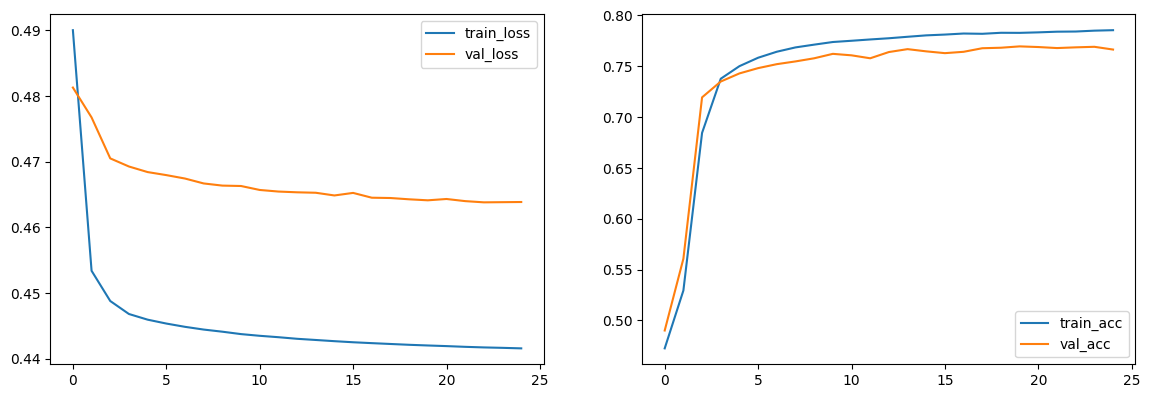

In [45]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder_hist = autoencoder.fit(
    x_train_color,
    x_train_color,
    batch_size=256,
    epochs=25,
    verbose=1,
    validation_data=(x_test_color, x_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(autoencoder_hist.history['loss'], label='train_loss')
plt.plot(autoencoder_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(autoencoder_hist.history['accuracy'], label='train_acc')
plt.plot(autoencoder_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_relu.png')

In [48]:
# Encoder
enc_input = Input(shape=(32, 32, 3))
enc_conv1 = Conv2D(32, (2, 2), activation='gelu', padding='same')(enc_input)
enc_pooling1 = MaxPooling2D(2, 2)(enc_conv1)
enc_conv2 = Conv2D(16, (2,2), activation='sigmoid', padding='same')(enc_pooling1)
enc_pooling2 = MaxPooling2D(2, 2)(enc_conv2)
enc_conv3 = Conv2D(8, (2, 2), activation='gelu', padding='same')(enc_pooling2)

encoder1 = Model(enc_input, enc_conv3)
encoder.summary()


# Decoder
dec_input = Input((8, 8, 8))
dec_conv1 = Conv2DTranspose(32, (3,3), strides = 2, activation='gelu', padding='same')(dec_input)
dec_conv2 = Conv2DTranspose(32, (3,3), strides = 2, activation='gelu', padding='same')(dec_conv1)
dec_output = Conv2D(3, (3,3), activation='sigmoid', padding='same')(dec_conv2)

decoder1 = Model(dec_input, dec_output)
decoder.summary()

# Autoencoder
ae_input = Input((32, 32 ,3))
ae_enc_out = encoder1(ae_input)
ae_dec_out = decoder1(ae_enc_out)

autoencoder1 = Model(ae_input, ae_dec_out)

autoencoder.summary()


Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 24)        3096      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 16)        1552      
                                                                 
Total params: 5,064
Trainable params: 5,064
Non-trainable params: 0
________________________________________________________

Epoch 1/35
340/340 [==============================] - 118s 344ms/step - loss: 0.4981 - accuracy: 0.5034 - val_loss: 0.4870 - val_accuracy: 0.5312
Epoch 2/35
340/340 [==============================] - 111s 328ms/step - loss: 0.4570 - accuracy: 0.5347 - val_loss: 0.4808 - val_accuracy: 0.5236
Epoch 3/35
340/340 [==============================] - 112s 330ms/step - loss: 0.4538 - accuracy: 0.5363 - val_loss: 0.4784 - val_accuracy: 0.5346
Epoch 4/35
340/340 [==============================] - 112s 329ms/step - loss: 0.4525 - accuracy: 0.5363 - val_loss: 0.4769 - val_accuracy: 0.5358
Epoch 5/35
340/340 [==============================] - 113s 332ms/step - loss: 0.4514 - accuracy: 0.5515 - val_loss: 0.4756 - val_accuracy: 0.5773
Epoch 6/35
340/340 [==============================] - 113s 334ms/step - loss: 0.4493 - accuracy: 0.6539 - val_loss: 0.4715 - val_accuracy: 0.6900
Epoch 7/35
340/340 [==============================] - 113s 332ms/step - loss: 0.4476 - accuracy: 0.7022 - val_loss: 0.4704 -

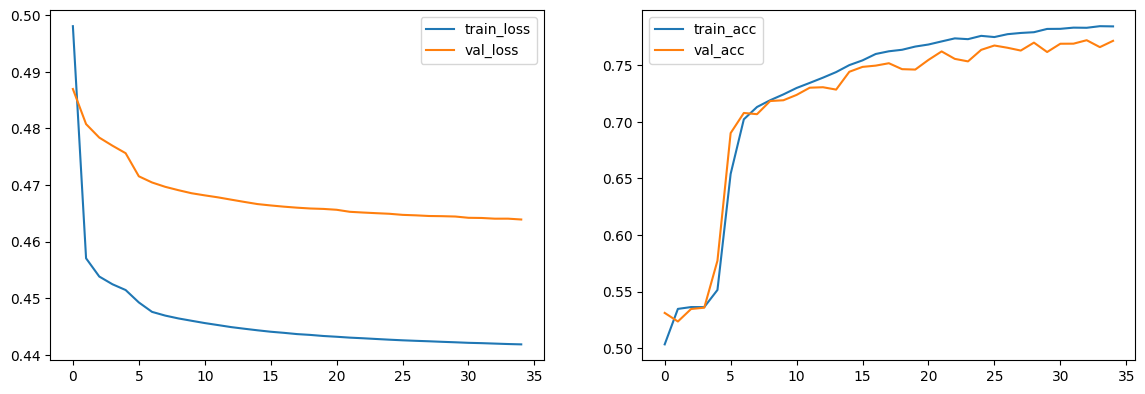

In [49]:
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

autoencoder_hist = autoencoder1.fit(
    x_train_color,
    x_train_color,
    batch_size=256,
    epochs=35,
    verbose=1,
    validation_data=(x_test_color, x_test_color)
)

plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(autoencoder_hist.history['loss'], label='train_loss')
plt.plot(autoencoder_hist.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(autoencoder_hist.history['accuracy'], label='train_acc')
plt.plot(autoencoder_hist.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])
plt.savefig('dnn_dropout40_relu.png')